# **Libraries & Dependencies**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# **Load Data**

The dataset used is the `Australian Vehicle Prices` dataset from Kaggle, a comprehensive dataset about the car market in Australia, containing variables like `Engine`, `Kilometres`, `Price`, etc.

- **Official Description:**

  This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/aus-vehicle/Australian Vehicle Prices.csv')
data_train, data_val = train_test_split(data, test_size=0.2, random_state=55, shuffle=True)
del data

In [4]:
data_train.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
119,Honda,2013.0,Civic,Sedan,2013 Honda Civic VTI-L,USED,Automatic,"4 cyl, 1.8 L",Front,Unleaded,6.7 L / 100 km,154347,Silver / -,"Minchinbury, NSW",4 cyl,Sedan,4 Doors,5 Seats,15990
6842,Mercedes-Benz,2010.0,C63,Sedan,2010 Mercedes-Benz C63 AMG Edition 63,USED,Automatic,"8 cyl, 6.2 L",Rear,Premium,13.4 L / 100 km,111236,White / -,"Thomastown, VIC",8 cyl,Sedan,4 Doors,5 Seats,69990
8982,Mitsubishi,2019.0,Triton,Ute / Tray,2019 Mitsubishi Triton GLX (4X4),USED,Automatic,"4 cyl, 2.4 L",4WD,Diesel,7.5 L / 100 km,71186,White / Black,"Cranbourne, VIC",4 cyl,Ute / Tray,2 Doors,5 Seats,34990
3243,Mitsubishi,2020.0,Outlander,SUV,2020 Mitsubishi Outlander ES 7 Seat (awd),USED,Automatic,"4 cyl, 2.4 L",AWD,Unleaded,7.2 L / 100 km,56495,Brown / -,"Ryde, NSW",4 cyl,SUV,4 Doors,7 Seats,28888
16159,Ford,2020.0,Ranger,SGM 4X4 & Commercials (Armidale),2020 Ford Ranger PX MkII XL Plus Utility Doubl...,USED,Automatic,-,Other,-,-,114403,White / -,"Armidale, NSW",-,Ute / Tray,NaN,NaN,41750


**Drop Irrelevant Columns**

Some of the columns in the dataset is irrelevant for the analysis and modeling process that will be performed. These includes the column(s) `Title` and `Car/Suv`. So, these columns are going to be dropped.

In [5]:
data_train.drop(['Title', 'Car/Suv'], axis=1, inplace=True)
data_val.drop(['Title', 'Car/Suv'], axis=1, inplace=True)

# **Data Wrangling**

Before conducting Exploratory Data Analysis and Modeling, first the data needs to be preprocessed and prepared first. The steps include:

- Data Discovery
- Data Cleaning:
  - Structuring, Formatting, and Transforming
  - Handle Duplicates, Outliers, Missing Values
- Data Enriching / Feature Engineering

### **Initial Data Discovery**

In [6]:
data_train.head()

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
119,Honda,2013.0,Civic,USED,Automatic,"4 cyl, 1.8 L",Front,Unleaded,6.7 L / 100 km,154347,Silver / -,"Minchinbury, NSW",4 cyl,Sedan,4 Doors,5 Seats,15990
6842,Mercedes-Benz,2010.0,C63,USED,Automatic,"8 cyl, 6.2 L",Rear,Premium,13.4 L / 100 km,111236,White / -,"Thomastown, VIC",8 cyl,Sedan,4 Doors,5 Seats,69990
8982,Mitsubishi,2019.0,Triton,USED,Automatic,"4 cyl, 2.4 L",4WD,Diesel,7.5 L / 100 km,71186,White / Black,"Cranbourne, VIC",4 cyl,Ute / Tray,2 Doors,5 Seats,34990
3243,Mitsubishi,2020.0,Outlander,USED,Automatic,"4 cyl, 2.4 L",AWD,Unleaded,7.2 L / 100 km,56495,Brown / -,"Ryde, NSW",4 cyl,SUV,4 Doors,7 Seats,28888
16159,Ford,2020.0,Ranger,USED,Automatic,-,Other,-,-,114403,White / -,"Armidale, NSW",-,Ute / Tray,NaN,NaN,41750


In [7]:
data_train.shape

(13387, 17)

In [8]:
data_train.dtypes

Brand                 object
Year                 float64
Model                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

##### **Univariate & Bivariate Analysis**

Some of the values in the dataset are not properly structured into the correct format yet, so this part will be re-visited again later on in the **Exploratory Data Analysis** section.

### **Data Cleaning**

The dataset used is still "dirty". So, it needs to be "cleaned" first before proceeding. This will be done by checking for bad entries and performing **formatting**, removing **duplicates** on the dataset, and handling **outliers** (or extreme values) as well as **missing values**.

##### **Structuring, Formatting, and Transforming**

The missing values in the `Transmission` variable is denoted as "-" , so it needs to be converted into a real missing value first in order for them to be detected properly later on.

In [9]:
print(data_train['Transmission'].unique())

['Automatic' '-' 'Manual']


In [10]:
data_train['Transmission'].replace('-', None, inplace=True)
data_val['Transmission'].replace('-', None, inplace=True)

The `Engine` variable is not in the right format, containing both cylinder size and engine size, so it needs to be reformatted by extracting ONLY the value of the engine size. Furthermore, the missing values are also denoted as "-", so the same handling process is performed as usual.

In [11]:
print(data_train['Engine'].unique()[:10])

['4 cyl, 1.8 L' '8 cyl, 6.2 L' '4 cyl, 2.4 L' '-' '6 cyl, 3 L'
 '4 cyl, 1.3 L' '4 cyl, 2.8 L' '4 cyl, 2.2 L' '4 cyl, 1.6 L'
 '4 cyl, 1.2 L']


In [12]:
data_train['Engine'].replace('-', None, inplace=True)
data_val['Engine'].replace('-', None, inplace=True)

data_train['Engine'] = data_train['Engine'].str.extract(r'(\d+\.\d+|\d+) L', expand=False)
data_val['Engine'] = data_val['Engine'].str.extract(r'(\d+\.\d+|\d+) L', expand=False)

 The missing values in `FuelType` are also denoted as "-", so the same handling process is performed as usual.

In [13]:
print(data_train['FuelType'].unique())

['Unleaded' 'Premium' 'Diesel' '-' 'Hybrid' 'Other' 'Electric' 'LPG'
 'Leaded']


In [14]:
data_train['FuelType'].replace('-', None, inplace=True)
data_val['FuelType'].replace('-', None, inplace=True)

The `FuelConsumption` variable is not of the right type, because it is in the form of a string with the pattern of "[FuelConsumption] / 100 km", so it needs to be reformatted by fetching the number from the string. The missing values are also denoted as "-", so the same process is performed as usual.

In [15]:
print(data_train['FuelConsumption'].unique()[:10])

['6.7 L / 100 km' '13.4 L / 100 km' '7.5 L / 100 km' '7.2 L / 100 km' '-'
 '6.8 L / 100 km' '5.7 L / 100 km' '9.1 L / 100 km' '7 L / 100 km'
 '7.9 L / 100 km']


In [16]:
data_train['FuelConsumption'].replace('-', None, inplace=True)
data_val['FuelConsumption'].replace('-', None, inplace=True)

data_train['FuelConsumption'] = data_train['FuelConsumption'].str.extract(r'(\d+\.\d+|\d+) L', expand=False)
data_val['FuelConsumption'] = data_val['FuelConsumption'].str.extract(r'(\d+\.\d+|\d+) L', expand=False)

The missing values in `Kilometres` are denoted as "-" and "- / -", so the same process is performed as usual.

In [17]:
print(data_train['Kilometres'].value_counts()[:5])

Kilometres
- / -    355
-        115
10        95
15        85
20        65
Name: count, dtype: int64


In [18]:
data_train['Kilometres'].replace(['-', '- / -'], None, inplace=True)
data_val['Kilometres'].replace(['-', '- / -'], None, inplace=True)

The `Location` variable is a string containing both the `Suburb` and `State` of the listing, so it is splitted it into two different columns.

In [19]:
print(data_train['Location'].unique()[:10])

['Minchinbury, NSW' 'Thomastown, VIC' 'Cranbourne, VIC' 'Ryde, NSW'
 'Armidale, NSW' 'Blacktown, NSW' 'Liverpool, NSW' 'Woodridge, QLD'
 'Rocklea, QLD' 'Loganholme, QLD']


In [20]:
data_train[['Suburb', 'State']] = data_train['Location'].str.split(', ', expand=True)
data_val[['Suburb', 'State']] = data_val['Location'].str.split(', ', expand=True)

data_train.drop('Location', axis=1, inplace=True)
data_val.drop('Location', axis=1, inplace=True)

The `CylindersinEngine` variable is not of the right type, because it is in the form of a string with the pattern of "[CylindersinEngine] cyl", so it needs to be reformatted by fetching the number from the string. The missing values are also denoted as "-", so the same process is performed as usual.

In [21]:
print(data_train['CylindersinEngine'].unique()[:5])

['4 cyl' '8 cyl' '-' '6 cyl' '5 cyl']


In [22]:
data_train['CylindersinEngine'].replace('-', None, inplace=True)
data_val['CylindersinEngine'].replace('-', None, inplace=True)

data_train['CylindersinEngine'] = data_train['CylindersinEngine'].str.extract(r'(\d+\.\d+|\d+) cyl', expand=False)
data_val['CylindersinEngine'] = data_val['CylindersinEngine'].str.extract(r'(\d+\.\d+|\d+) cyl', expand=False)

The `Doors` variable is not in the right format, because it is in the form of a string with the pattern of "[Doors] Doors", and sometimes they are even completely wrong and not about the number of `Doors` (some of them are about the number of `Seats` instead of `Doors`) so it needs to be reformatted by fetching the number from the string if it is about the number of `Doors`.

In [23]:
print(data_train['Doors'].unique())

[' 4 Doors' ' 2 Doors' nan ' 5 Doors' ' 7 Seats' ' 3 Doors' ' 5 Seats'
 ' 6 Seats' ' 4 Seats' ' 12 Seats' ' 9 Seats' ' 3 Seats' ' 2 Seats'
 ' 8 Seats']


In [24]:
data_train['Doors'] = data_train['Doors'].str.extract(r'(\d+\.\d+|\d+) Doors', expand=False)
data_val['Doors'] = data_val['Doors'].str.extract(r'(\d+\.\d+|\d+) Doors', expand=False)

The `Seats` variable is not in the right format, because it is in the form of a string with the pattern of "[Seats] Seats", so it needs to be reformatted by fetching the number from the string.

In [25]:
print(data_train['Seats'].unique())

[' 5 Seats' ' 7 Seats' nan ' 4 Seats' ' 2 Seats' ' 8 Seats' ' 3 Seats'
 ' 14 Seats' ' 6 Seats' ' 11 Seats' ' 15 Seats' ' 9 Seats' ' 22 Seats'
 ' 12 Seats']


In [26]:
data_train['Seats'] = data_train['Seats'].str.extract(r'(\d+\.\d+|\d+) Seats', expand=False)
data_val['Seats'] = data_val['Seats'].str.extract(r'(\d+\.\d+|\d+) Seats', expand=False)

In the `Price` variable, where logically, all values should be numbers, there exists non-numeric values, such as "POA", which stands for "Price on Application". Because it isn't to possible decode the value, they will just be set as `NULL`.

In [27]:
non_num = []
for i in data_train['Price'].dropna().values:
    try:
        num = float(i)
    except:
        non_num.append(i)

print(np.unique(non_num))

['POA']


In [28]:
data_train['Price'] = pd.to_numeric(data_train['Price'], errors='coerce')
data_val['Price'] = pd.to_numeric(data_val['Price'], errors='coerce')

Finally, each column's data types will be converted to their appropriate data types.

In [29]:
num_cols = ['Year', 'Engine', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats']
cat_cols = ['Transmission', 'DriveType', 'FuelType', 'BodyType']
ord_cols = ['UsedOrNew']

In [30]:
data_train[num_cols + ['Price']] = data_train[num_cols + ['Price']].astype(float)
data_train[cat_cols] = data_train[cat_cols].astype('category')
data_val[num_cols + ['Price']] = data_val[num_cols + ['Price']].astype(float)
data_val[cat_cols] = data_val[cat_cols].astype('category')

In [31]:
data_train.dtypes

Brand                  object
Year                  float64
Model                  object
UsedOrNew              object
Transmission         category
Engine                float64
DriveType            category
FuelType             category
FuelConsumption       float64
Kilometres            float64
ColourExtInt           object
CylindersinEngine     float64
BodyType             category
Doors                 float64
Seats                 float64
Price                 float64
Suburb                 object
State                  object
dtype: object

##### **Handle Duplicates**

There exists duplicated listings in the dataset, and this will be handled by dropping those duplicates.

In [32]:
data_train.duplicated().sum()

6

In [33]:
data_val.duplicated().sum()

0

In [34]:
data_train[data_train.duplicated(keep=False)]

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price,Suburb,State
701,MG,2023.0,ZST,NEW,Automatic,1.3,Front,NaN,7.3,15.0,Red / Black,3.0,SUV,5.0,5.0,35690.0,Blacktown,NSW
11660,Ssangyong,2023.0,Musso,NEW,Automatic,2.2,4WD,Diesel,8.6,22.0,White / Black,4.0,Ute / Tray,4.0,5.0,46685.0,Frankston,VIC
818,MG,2023.0,ZST,NEW,Automatic,1.3,Front,NaN,7.3,15.0,Red / Black,3.0,SUV,5.0,5.0,35690.0,Blacktown,NSW
14903,Ineos,2023.0,Grenadier,NEW,Automatic,3.0,4WD,Unleaded,12.6,NaN,5 years / Unlimited km,6.0,SUV,4.0,5.0,109525.0,NaN,NaN
1596,MG,2022.0,MG3,NEW,Automatic,1.5,Front,Premium,6.7,15.0,Silver / Black & Grey Cloth,4.0,Hatchback,5.0,5.0,19490.0,Blacktown,NSW
15098,McLaren,2023.0,720S,NEW,Automatic,4.0,Rear,Premium,11.0,NaN,3 years / Unlimited km,8.0,Coupe,2.0,2.0,524580.0,NaN,NaN
482,MG,2022.0,MG3,NEW,Automatic,1.5,Front,Premium,6.7,15.0,White / Black & Grey Cloth,4.0,Hatchback,5.0,5.0,19490.0,Blacktown,NSW
1174,MG,2022.0,MG3,NEW,Automatic,1.5,Front,Premium,6.7,15.0,White / Black & Grey Cloth,4.0,Hatchback,5.0,5.0,19490.0,Blacktown,NSW
1589,MG,2022.0,MG3,NEW,Automatic,1.5,Front,Premium,6.7,15.0,Silver / Black & Grey Cloth,4.0,Hatchback,5.0,5.0,19490.0,Blacktown,NSW
14866,Ineos,2023.0,Grenadier,NEW,Automatic,3.0,4WD,Unleaded,12.6,NaN,5 years / Unlimited km,6.0,SUV,4.0,5.0,109525.0,NaN,NaN


In [35]:
data_train.drop_duplicates(inplace=True)
data_val.drop_duplicates(inplace=True)

##### **Handle Outliers**

Outliers or Extreme Values can cause serious problems during the analysis and modeling that will be performed later on. After exploring the dataset, it seems that there may be potential outliers on the `Seats` and `Price` variables.

**Seats**

In the `Seats` variable, there are some values that seems abnormal. Some cars have more than 10 seats, and even up to 20. So, let's take a deeper look at these observations.

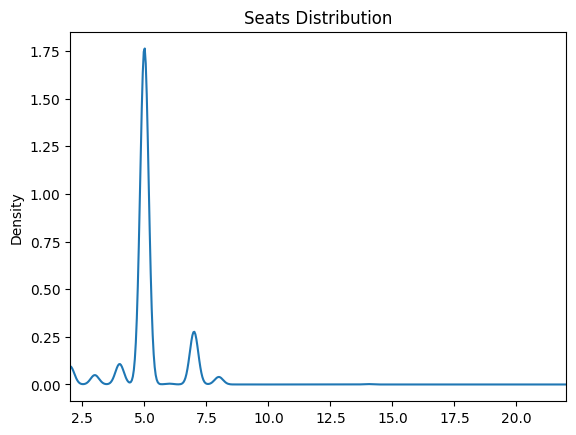

In [36]:
data_train['Seats'].dropna().plot(kind='density')
plt.title('Seats Distribution')
plt.xlim(min(data_train['Seats'].dropna()), max(data_train['Seats'].dropna()))
plt.show()

In [37]:
data_train[data_train['Seats'] > 10]

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price,Suburb,State
15386,LDV,2023.0,Deliver,NEW,Automatic,2.0,Rear,Diesel,0.0,NaN,"3 years / 160,000 km",3.0,Other,2.0,14.0,64200.0,NaN,NaN
15522,Toyota,2007.0,HiAce,USED,Automatic,2.7,Rear,Unleaded,12.6,77512.0,White / -,4.0,People Mover,3.0,14.0,34990.0,Five Dock,NSW
15566,Toyota,2015.0,Hiace,USED,Automatic,3.0,Rear,Diesel,8.0,193375.0,White / -,4.0,People Mover,3.0,14.0,43990.0,Five Dock,NSW
5339,Toyota,1998.0,Landcruiser,USED,Manual,4.2,4WD,Diesel,0.0,209031.0,Red / -,6.0,SUV,2.0,11.0,45950.0,Penrith,NSW
14885,Mercedes-Benz,2023.0,Sprinter,NEW,Automatic,2.0,Rear,Diesel,0.0,NaN,"5 years / 250,000 km",4.0,Other,2.0,15.0,91537.0,NaN,NaN
13694,Toyota,2022.0,Coaster,USED,Automatic,2.8,Rear,Diesel,0.0,3842.0,White / -,4.0,People Mover,3.0,22.0,155988.0,Bentley,WA
8936,Toyota,2007.0,HiAce,USED,Automatic,3.0,Rear,Diesel,9.6,245124.0,Blue / -,4.0,People Mover,3.0,14.0,27999.0,Rocklea,QLD
54,Toyota,2016.0,HiAce,USED,Automatic,2.7,Rear,Unleaded,10.9,119614.0,Silver / Black,4.0,People Mover,3.0,14.0,44900.0,Ingleburn,NSW
15577,Toyota,2008.0,HiAce,USED,Automatic,2.7,Rear,Unleaded,12.6,324088.0,White / Grey,4.0,People Mover,3.0,14.0,29999.0,Pennant Hills,NSW
14767,Toyota,2023.0,HiAce,NEW,Automatic,2.8,Rear,Diesel,0.0,NaN,5 years / Unlimited km,4.0,People Mover,3.0,12.0,69760.0,NaN,NaN


It turns out that these abnormal `Seats` values are associated to bigger cars that mainly belongs to the `SUV` / `People Mover` category, and it seems that this makes sense and they are not outliers, so they will just be left as they are.

**Price**

The values of `Price` are heavily skewed to the right. So let's take a deeper look at these observations.

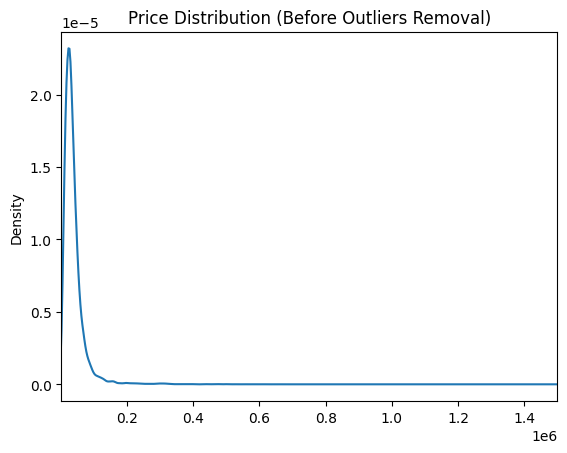

In [38]:
data_train['Price'].dropna().plot(kind='density')
plt.title('Price Distribution (Before Outliers Removal)')
plt.xlim(min(data_train['Price'].dropna()), max(data_train['Price'].dropna()))
plt.show()

In [39]:
upper = np.percentile(data_train['Price'].dropna(), q=98)
data_train[data_train['Price'] > upper].head(10)

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price,Suburb,State
2743,Land,2018.0,Rover,USED,Automatic,4.4,AWD,Diesel,8.4,93127.0,Black / Red,8.0,SUV,4.0,5.0,189990.0,Glebe,NSW
3849,Land,2023.0,Rover,USED,Automatic,3.0,AWD,Diesel,7.2,1210.0,Black / Black,6.0,SUV,4.0,5.0,324990.0,Auburn,NSW
6531,Porsche,2007.0,911,USED,Manual,3.6,Rear,Premium,19.8,17648.0,White / -,6.0,Coupe,2.0,2.0,309911.0,Fyshwick,ACT
4053,Audi,2023.0,E-Tron,DEMO,Automatic,0.0,AWD,Electric,0.0,2088.0,Grey / Paranut Brown/Black Dash 2T,NaN,Sedan,4.0,5.0,283688.0,Artarmon,NSW
15089,Porsche,2023.0,Panamera,NEW,Automatic,2.9,AWD,Premium,9.6,NaN,3 years / Unlimited km,6.0,Sedan,4.0,4.0,219100.0,NaN,NaN
502,BMW,2022.0,M5,USED,Automatic,4.4,AWD,Premium,10.5,8525.0,Blue / Beige,8.0,Sedan,4.0,5.0,219880.0,Blacktown,NSW
15133,Porsche,2023.0,Cayenne,NEW,Automatic,3.0,AWD,Hybrid,3.2,NaN,3 years / Unlimited km,6.0,SUV,4.0,5.0,163600.0,NaN,NaN
7640,Mercedes-Benz,2020.0,C63,USED,Automatic,4.0,Rear,Premium,10.4,7045.0,White / Black Leather,8.0,Sedan,4.0,5.0,175990.0,Southport,QLD
5023,Porsche,2018.0,718,USED,Manual,2.5,Rear,Unleaded,9.1,22638.0,Red / Black,4.0,Coupe,2.0,2.0,169888.0,Carlton,NSW
15323,Porsche,2023.0,718,NEW,Automatic,2.5,Rear,Unleaded,7.4,NaN,3 years / Unlimited km,4.0,Convertible,2.0,2.0,158180.0,NaN,NaN


It turns out that these high `Price` values are associated to cars that can be considered as luxury cars, and it seems that these observations are plausible and they are not outliers, so they will just be left as they are.

##### **Handle Missing Values**

There exists missing values or null values in various columns of the dataset, and they need to be handled accordingly before proceeding further, so that we can have a smooth analysis and modeling process.

In [40]:
data_train.isna().sum()

Brand                   0
Year                    0
Model                   0
UsedOrNew               0
Transmission          201
Engine               1316
DriveType               0
FuelType              505
FuelConsumption      1334
Kilometres            468
ColourExtInt            0
CylindersinEngine    1404
BodyType              214
Doors                1315
Seats                1341
Price                  39
Suburb                353
State                 353
dtype: int64

In [41]:
data_val.isna().sum()

Brand                  1
Year                   1
Model                  1
UsedOrNew              1
Transmission          51
Engine               360
DriveType              1
FuelType             132
FuelConsumption      364
Kilometres           122
ColourExtInt           1
CylindersinEngine    378
BodyType              68
Doors                360
Seats                364
Price                 14
Suburb                95
State                 95
dtype: int64

In [42]:
data_train.dropna(subset=['Price'], inplace=True)
data_val.dropna(subset=['Price'], inplace=True)

In [43]:
# Engine, FuelConsumption, Kilometres, CylindersinEngine, Doors, Seats

In [44]:
for col in num_cols:
    med_val = data_train[col].median()
    data_train[col].fillna(med_val, inplace=True)
    data_val[col].fillna(med_val, inplace=True)

In [45]:
data_train['Transmission'].value_counts()

Transmission
Automatic    11531
Manual        1616
Name: count, dtype: int64

In [46]:
data_train['Transmission'].fillna('Automatic', inplace=True)
data_val['Transmission'].fillna('Automatic', inplace=True)

In [47]:
data_train['FuelType'].value_counts()

FuelType
Unleaded    5577
Diesel      3898
Premium     2703
Hybrid       521
Electric      95
Other         34
LPG           10
Leaded         4
Name: count, dtype: int64

In [48]:
data_train.loc[data_train['FuelType'].isna(), 'FuelType'] = np.random.choice(['Unleaded', 'Diesel', 'Premium'], size=data_train['FuelType'].isna().sum())
data_val.loc[data_val['FuelType'].isna(), 'FuelType'] = np.random.choice(['Unleaded', 'Diesel', 'Premium'], size=data_val['FuelType'].isna().sum())

In [49]:
data_train['BodyType'].value_counts()

BodyType
SUV             5487
Hatchback       2165
Ute / Tray      2012
Sedan           1587
Wagon            965
Commercial       489
Coupe            280
Convertible      108
Other             19
People Mover      17
Name: count, dtype: int64

In [50]:
data_train['BodyType'].fillna('SUV', inplace=True)
data_val['BodyType'].fillna('SUV', inplace=True)

### **Data Enriching / Feature Engineering**

Now let's enrich the dataset and perform **feature engineering**, such as by transforming the variables, combining different variables, etc, in order to capture more patterns in the dataset

The response variable `Price` is heavily skewed to the right. So let's create a new variable `LogPrice` by applying a *log transformation* to `Price` in order to make it more normally distributed.

In [51]:
data_train['LogPrice'] = np.log(data_train['Price'])
data_val['LogPrice'] = np.log(data_val['Price'])

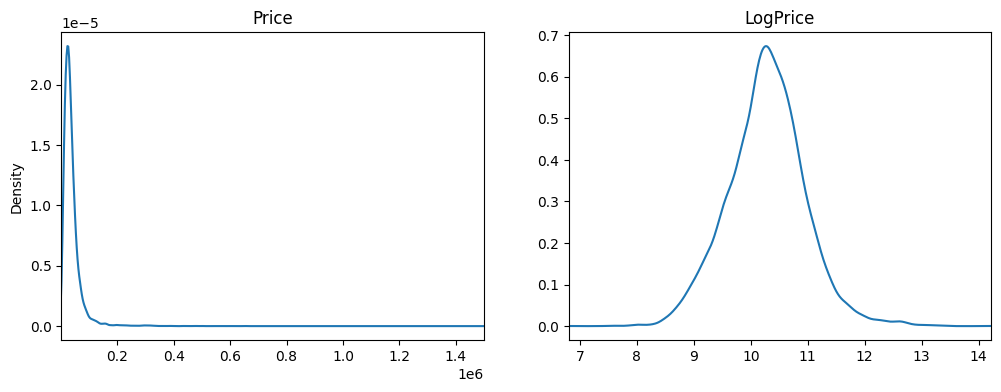

In [52]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
data_train['Price'].dropna().plot(kind='density')
plt.title('Price')
plt.xlim(min(data_train['Price'].dropna()), max(data_train['Price'].dropna()))

plt.subplot(1, 2, 2)
data_train['LogPrice'].dropna().plot(kind='density')
plt.title('LogPrice')
plt.ylabel('')
plt.xlim(min(data_train['LogPrice'].dropna()), max(data_train['LogPrice'].dropna()))

plt.show()

In [53]:
# More Coming Soon

# **Exploratory Data Analysis**

Let's try to extract meaningful patterns and insights from the dataset by performing **EDA**.

### **Univariate Analysis**

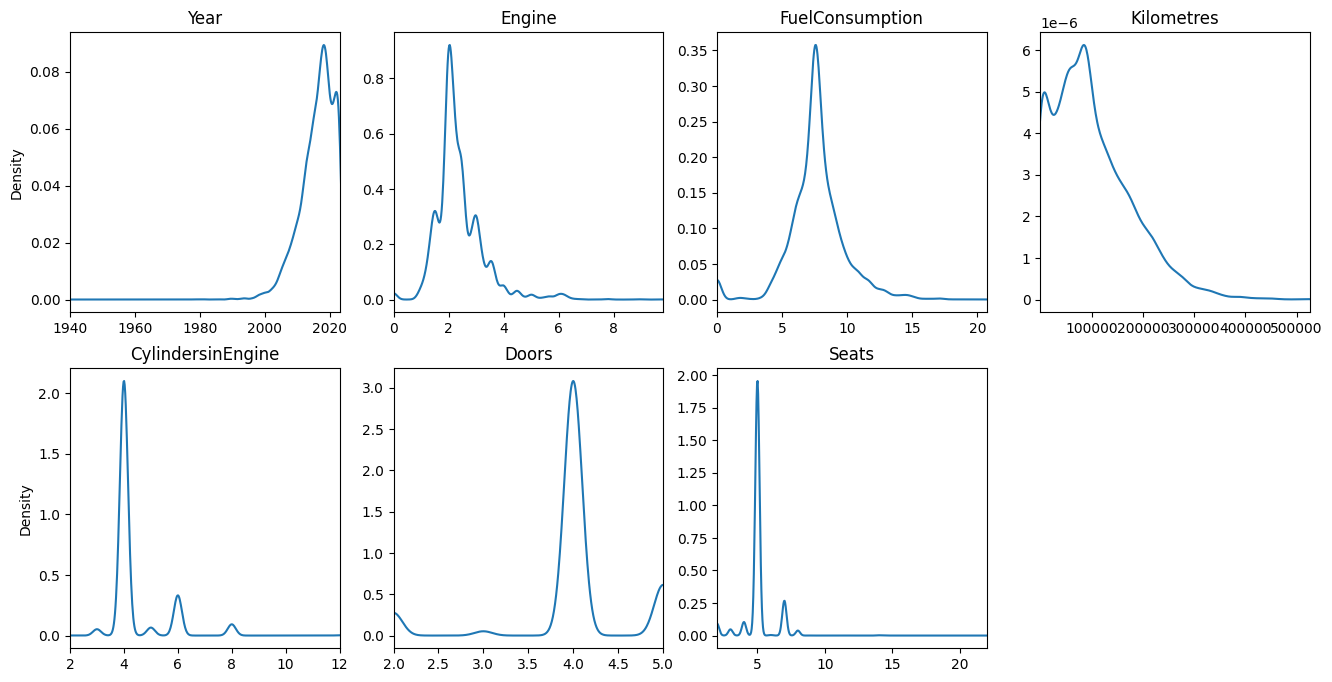

In [54]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    data_train[col].plot(kind='density')
    plt.title(col)
    if i % 4 != 0:
        plt.ylabel('')
    plt.xlim(min(data_train[col]), max(data_train[col]))
plt.show()

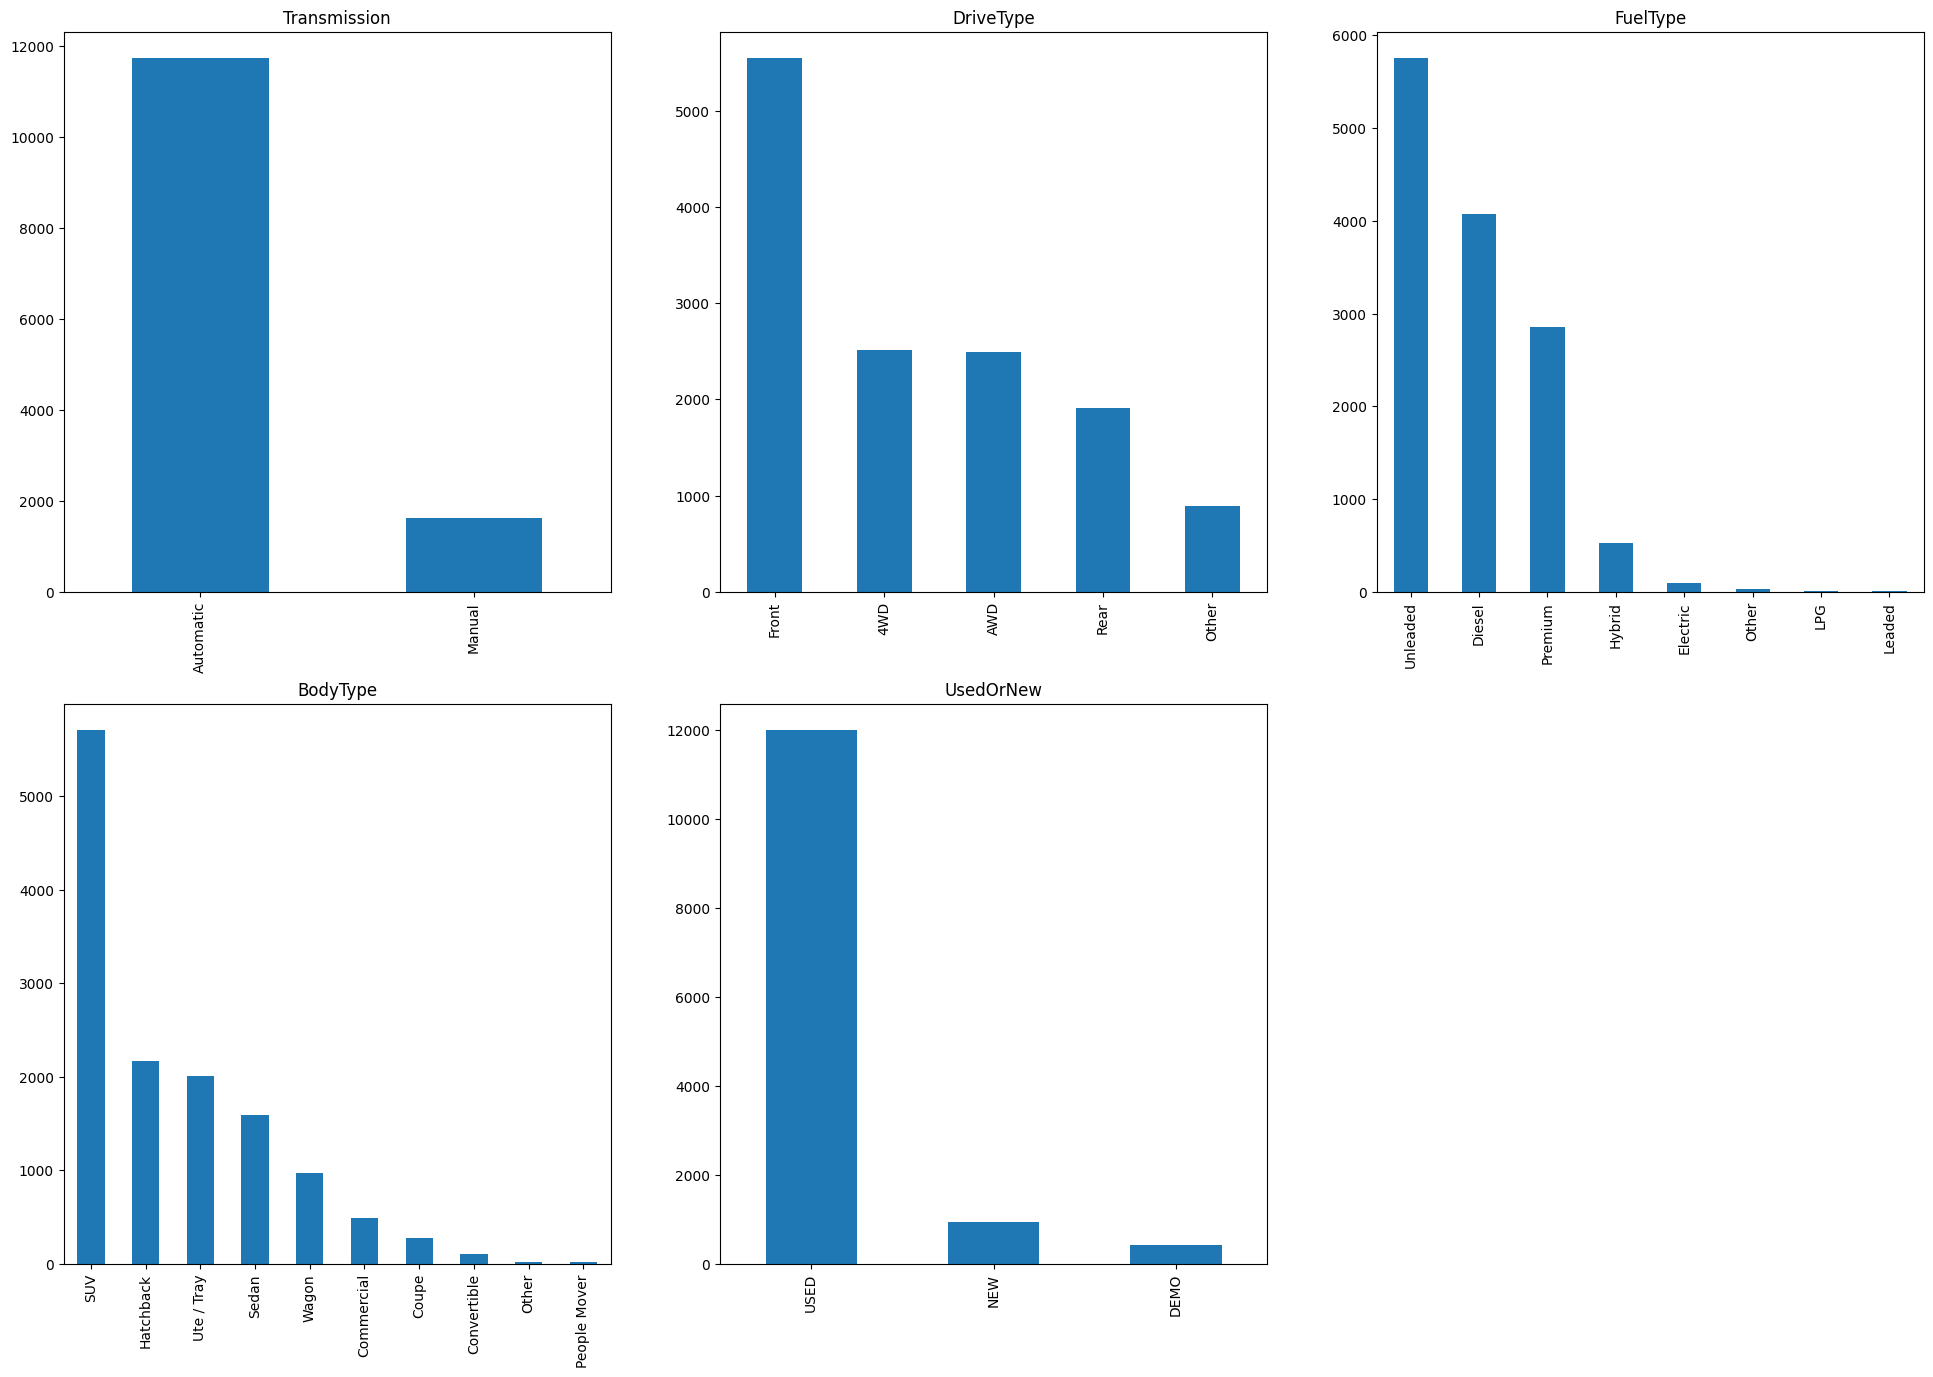

In [55]:
plt.figure(figsize=(24, 16))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    data_train[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('')
    #plt.xticks(rotation=45)
plt.subplot(2, 3, 5)
data_train['UsedOrNew'].value_counts().plot(kind='bar')
plt.title('UsedOrNew')
plt.xlabel('')
#plt.xticks(rotation=45)
plt.show()

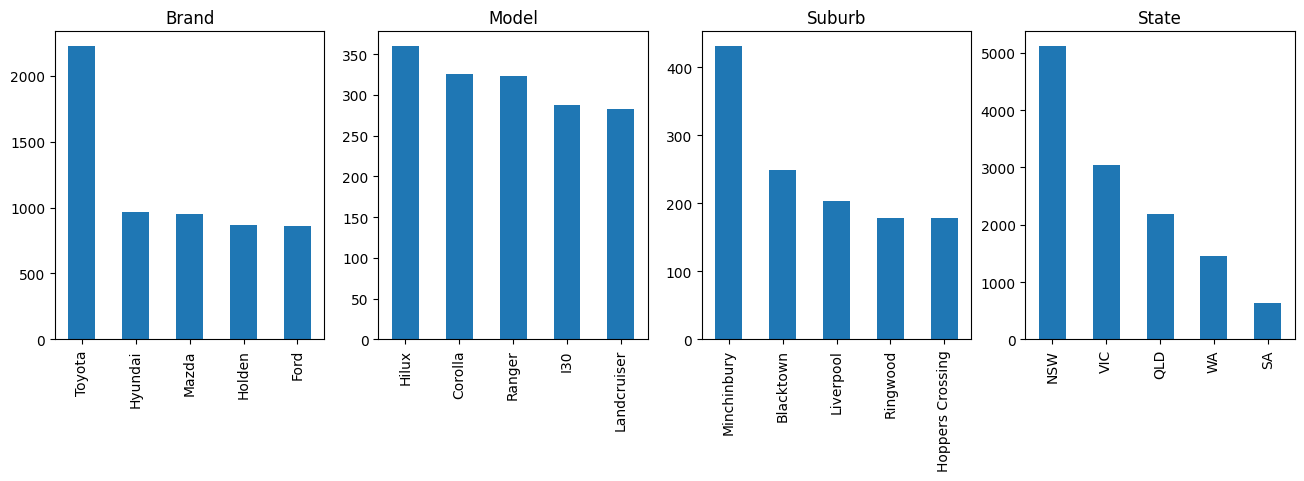

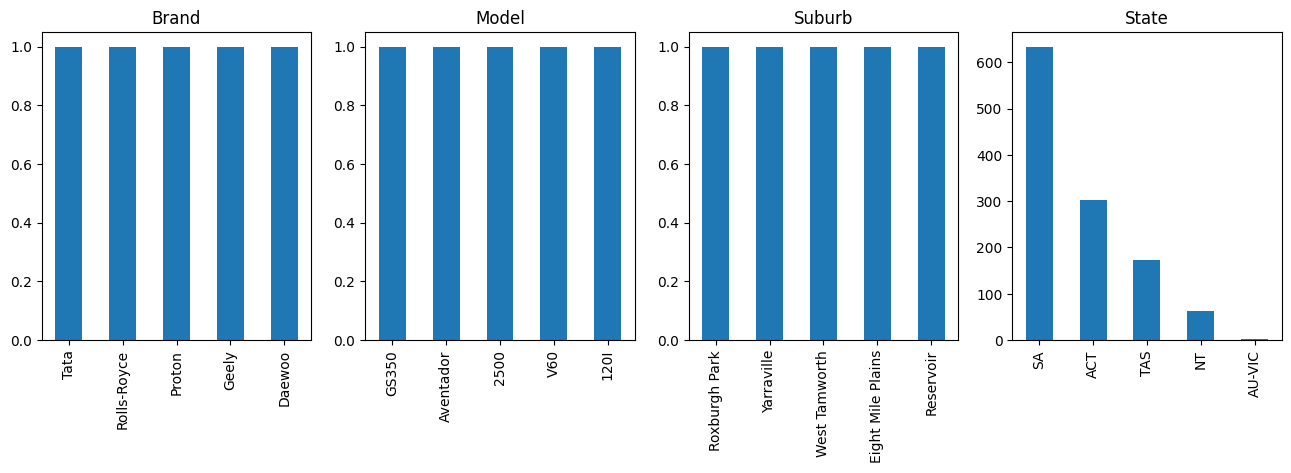

In [56]:
plt.figure(figsize=(16, 4))
for i, col in enumerate(['Brand', 'Model', 'Suburb',	'State']):
    plt.subplot(1, 4, i+1)
    data_train[col].value_counts()[:5].plot(kind='bar')
    plt.title(col)
    plt.xlabel('')
plt.show()

plt.figure(figsize=(16, 4))
for i, col in enumerate(['Brand', 'Model', 'Suburb',	'State']):
    plt.subplot(1, 4, i+1)
    data_train[col].value_counts()[-5:].plot(kind='bar')
    plt.title(col)
    plt.xlabel('')
plt.show()

### **Bivariate Analysis**

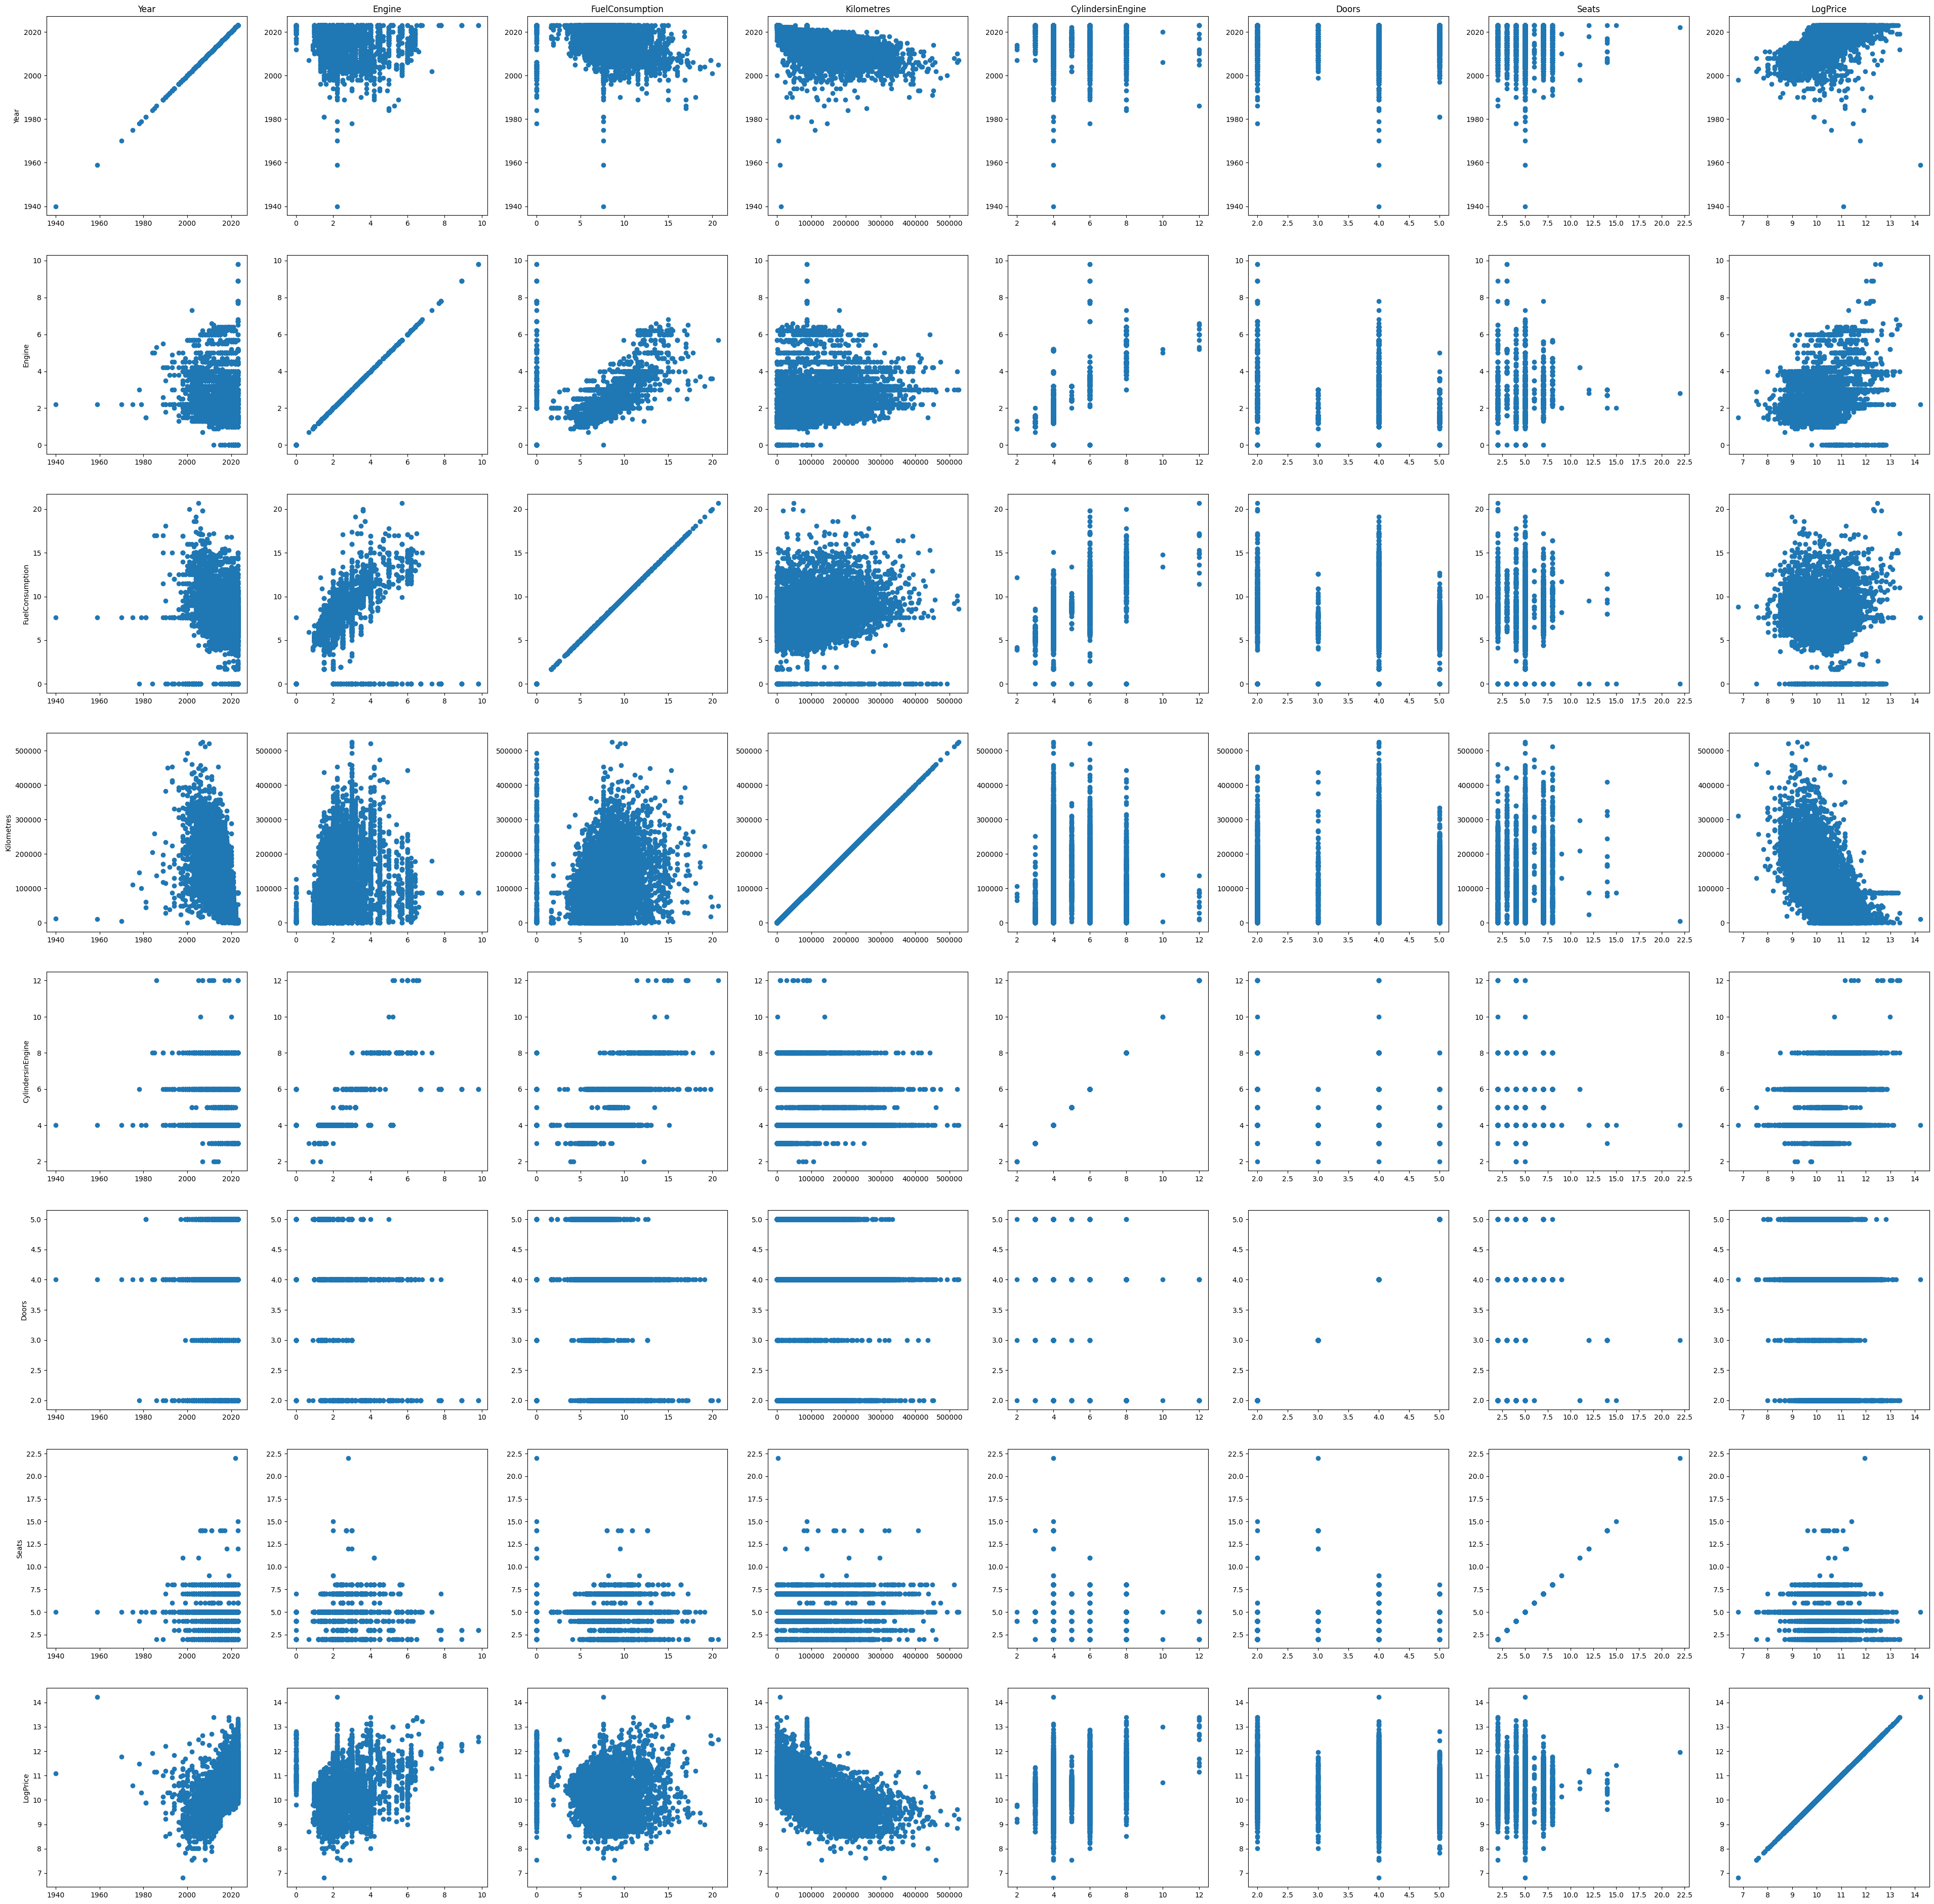

In [57]:
plt.figure(figsize=(48, 48))
idx = 1
for i, col_1 in enumerate(num_cols + ['LogPrice']):
    for j, col_2 in enumerate(num_cols + ['LogPrice']):
        plt.subplot(8, 8, idx)
        plt.scatter(data_train[col_2], data_train[col_1])
        if (idx-1) % 8 == 0:
            plt.ylabel(col_1)
        if idx <= 8:
            plt.title(col_2)
        idx += 1
plt.show()

### **More EDA**

In [58]:
# Coming Soon

# **Model**

Now, the data is already well prepared and preprocessed, and it is (almost) ready to be fed into the model. But before that, some finishing touches needs to be performed first, such as **Feature Selection**, **Categorical Variables Encoding**, **(Numerical Variables Scaling)**, and **Polynomial Features Creation**, before finally diving into the modeling part.

### **Feature Selection**

Variables that are **useless** for the model's prediction will be dropped, and highly **correlated** variables will also be dropped, as they are not good for both the model's prediction and inference process.

##### **Useless Columns**

In [59]:
drop_cols = ['Brand', 'Model', 'ColourExtInt', 'Suburb',	'State']

data_train.drop(drop_cols, axis=1, inplace=True)
data_val.drop(drop_cols, axis=1, inplace=True)

##### **Correlated Variables**

In [60]:
corr = data_train[num_cols + ['LogPrice']].corr()
corr

,Year,Engine,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,LogPrice
Year,1.000000,-0.175675,-0.253547,-0.689436,-0.167688,0.062678,0.012264,0.637210
Engine,-0.175675,1.000000,0.555832,0.226760,0.799734,-0.311335,0.038785,0.228738
FuelConsumption,-0.253547,0.555832,1.000000,0.216365,0.504863,-0.171064,0.075595,-0.057935
Kilometres,-0.689436,0.226760,0.216365,1.000000,0.130514,-0.106144,0.006640,-0.585971
CylindersinEngine,-0.167688,0.799734,0.504863,0.130514,1.000000,-0.235553,0.014438,0.231249
Doors,0.062678,-0.311335,-0.171064,-0.106144,-0.235553,1.000000,0.375987,-0.158059
Seats,0.012264,0.038785,0.075595,0.006640,0.014438,0.375987,1.000000,0.014078
LogPrice,0.637210,0.228738,-0.057935,-0.585971,0.231249,-0.158059,0.014078,1.000000


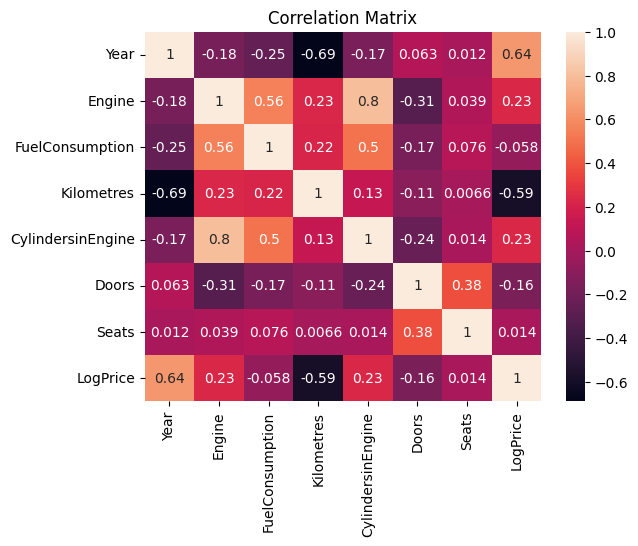

In [61]:
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

The variables `Engine` and `CylindersinEngine` are highly correlated with each other, with a correlation coefficient of `0.81`. So, one of them will be dropped.

In [62]:
data_train.drop(['CylindersinEngine'], axis=1, inplace=True)
data_val.drop(['CylindersinEngine'], axis=1, inplace=True)
num_cols.remove('CylindersinEngine')

### **Categorical Variables Encoding**

Some of the models that are going to be used can only accept numerical variables, and cannot handle categorical variables, so they will need to be one-hot encoded first in order to be properly fed into the model.

In [63]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ord_enc = OrdinalEncoder(dtype=int, categories=[['USED', 'DEMO', 'NEW']])
oh_enc = OneHotEncoder(dtype=int)

data_train['UsedOrNew'] = ord_enc.fit_transform(data_train[['UsedOrNew']])
data_val['UsedOrNew'] = ord_enc.transform(data_val[['UsedOrNew']])
one_hot_columns_train = oh_enc.fit_transform(data_train[cat_cols])
one_hot_columns_val = oh_enc.transform(data_val[cat_cols])

data_train.drop(cat_cols, axis=1, inplace=True)
data_train[oh_enc.get_feature_names_out()] = one_hot_columns_train.toarray()
data_val.drop(cat_cols, axis=1, inplace=True)
data_val[oh_enc.get_feature_names_out()] = one_hot_columns_val.toarray()

### **Polynomial Features**

For polynomial regression.

In [64]:
from sklearn.preprocessing import PolynomialFeatures

use_poly = True

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

if use_poly:
    poly_train = poly.fit_transform(data_train[num_cols])
    poly_val = poly.fit_transform(data_val[num_cols])

    data_train.drop(num_cols, axis=1, inplace=True)
    data_val.drop(num_cols, axis=1, inplace=True)

    data_train = pd.concat([data_train.reset_index(drop=True), pd.DataFrame(poly_train, columns=poly.get_feature_names_out())], axis=1)
    data_val = pd.concat([data_val.reset_index(drop=True), pd.DataFrame(poly_val, columns=poly.get_feature_names_out())], axis=1)

### **Numerical Variables Scaling**

This actually depends on what the objective during inference is. If we want to interpret the model in a way such that we can know how much does each of the feature variables affect the response variable, then we shouldn't scale the numerical variables. But, if we want to get a better sense of the relative importance of each feature variables to the response variable, then we should scale the numerical variables.

Neverless, whether the numerical variables are scaled or not doesn't affect the
prediction power of the model.

In [65]:
from sklearn.preprocessing import MinMaxScaler

do_scaling = False

scaler = MinMaxScaler()

if do_scaling:
    if use_poly:
        data_train[poly.get_feature_names_out().tolist() + ['UsedOrNew']] = scaler.fit_transform(data_train[poly.get_feature_names_out().tolist() + ['UsedOrNew']])
        data_val[poly.get_feature_names_out().tolist() + ['UsedOrNew']] = scaler.transform(data_val[poly.get_feature_names_out().tolist() + ['UsedOrNew']])
    else:
        data_train[num_cols + ['UsedOrNew']] = scaler.fit_transform(data_train[num_cols + ['UsedOrNew']])
        data_val[num_cols + ['UsedOrNew']] = scaler.transform(data_val[num_cols + ['UsedOrNew']])

### **Split Features and Labels**

In [74]:
X_train = data_train.drop(['Price', 'LogPrice'], axis=1)
y_train = data_train['LogPrice']

X_val = data_val.drop(['Price', 'LogPrice'], axis=1)
y_val = data_val['LogPrice']

### **Start Modeling**

These models are going to be used to perform the prediction:

- Linear Regression
- Random Forest Regression

Each of them are different in terms of complexity, predictive power, and interpretability. The latter is the most complex one, so it should have the strongest prediction power, but the lowest interpretability.

##### **Train Models**

In [75]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [76]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

##### **Evaluation**

Next, the model's performance are going to be evaluated using the *Mean-Squared Error* and the *R^2 Score*. The *R^2 Score* denotes the proportion of the response variable's variance that is successfully explained by the predictors or the model.

In [77]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train_reg = model_reg.predict(X_train)
y_pred_val_reg = model_reg.predict(X_val)

y_pred_train_rf = model_rf.predict(X_train)
y_pred_val_rf = model_rf.predict(X_val)

print('Linear Regression:')
print('Train MSE :', mean_squared_error(y_train, y_pred_train_reg))
print('Val MSE   :', mean_squared_error(y_val, y_pred_val_reg))
print('Train R^2 :', r2_score(y_train, y_pred_train_reg))
print('Val R^2   :', r2_score(y_val, y_pred_val_reg))
print()
print('========')
print()
print('Random Forest Regression:')
print('Train MSE :', mean_squared_error(y_train, y_pred_train_rf))
print('Val MSE   :', mean_squared_error(y_val, y_pred_val_rf))
print('Train R^2 :', r2_score(y_train, y_pred_train_rf))
print('Val R^2   :', r2_score(y_val, y_pred_val_rf))

Linear Regression:
Train MSE : 0.10579795209601218
Val MSE   : 0.1064079292378851
Train R^2 : 0.7696389966917758
Val R^2   : 0.7676274185069949


Random Forest Regression:
Train MSE : 0.008810239602098322
Val MSE   : 0.06342145538635072
Train R^2 : 0.9808168722180614
Val R^2   : 0.8615008541588768


The R^2 of the Linear Regression model is 0.77, meaning that 77% of the response variable's variance can successfully be explained by the predictors or the model. The R^2 of the Random Forest model is much higher at 0.86, although this comes with the expense of a lower model interpretability, as explained before.

# **Inference**

Now, we have created a machine-learning model capable of predicting a car's price using various features. Now, let's analyze and interpret the model, in order to understand more about the relationship between the predictor variables and the response variable.

In [84]:
coefficients = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(np.transpose(model_reg.coef_))], axis=1)
coefficients.columns = ['Variable', 'Coeff']

In [91]:
coefficients

,Variable,Coeff
0,UsedOrNew,-1.102067e-02
1,Transmission_Automatic,1.993945e-02
2,Transmission_Manual,-1.941242e-02
3,DriveType_4WD,7.996258e-02
4,DriveType_AWD,7.293653e-02
5,DriveType_Front,-2.081061e-01
6,DriveType_Other,1.291620e-01
7,DriveType_Rear,-7.395510e-02
8,FuelType_Diesel,-1.487478e-01
9,FuelType_Electric,4.104681e-01


In [92]:
coefficients[coefficients['Variable'] == 'Year']

,Variable,Coeff
26,Year,-6.473043


In [93]:
coefficients[coefficients['Variable'] == 'Engine']

,Variable,Coeff
27,Engine,0.66


In [94]:
coefficients[coefficients['Variable'] == 'FuelConsumption']

,Variable,Coeff
28,FuelConsumption,-0.503424


In [95]:
coefficients[coefficients['Variable'] == 'Kilometres']

,Variable,Coeff
29,Kilometres,-0.000186


For example here:
- A 1 unit increase in `Year` will result in a 6.5 decrease in `LogPrice`
- A 1 unit increase in `Engine` will result in a 0.66 increase in `LogPrice`
- A 1 unit increase in `FuelConsumption` will result in a 0.5 decrease in `LogPrice`
- A 1 unit increase in `Kilometres` will result in a 0.0002 decrease in `LogPrice`

In [ ]:
# More Coming Soon